# Figure 1

Run the steps below to generate the data and plot of Figure 1. As generating the data takes a while, one skip this step by inmediately running the last cell of this Jupyter notebook.

**Lennart van Sluijs** // 2019 Jan 8 // Leiden Observatory // vansluijs@strw.leidenuniv.nl

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
from pir_class import *
from sts_class import *

# Load Spectral Time Series
Load the Spectral Time Series from the Beta Pictoris UVES data.

In [2]:
sts = SpectralTimeSeries()
sts.load('../data', 'sts')

# Planet injection routine
Simulate lineprofiles and run planet injection routine.

In [3]:
# parameters for the planet injection routine
Rp = np.linspace(0.1, 1.0, 10) # planet radii injected [Rjup]
b = np.linspace(0, 1.0, 1) # impact parameter injected
A = 0.8 # intrinsic line depth
theta = 0 # spin-orbit misalignment
mode = 'wn' # planet injection routine in white-noise (wn) mode
spectsnr = 1200 # spectral SNR used for the white noise simulation
outputfolder = '../output/figure1/pir_wn' # outputfolder
veq = 130 # v sin i Beta Pic [km/s]
x0 = np.array([-200., -120., -100., -80., -60., -40., -20., 0., 20.,
          40., 60., 80., 100., 120., 200.])/veq # positions in front of star
snrlim = 3.0 # limit for the sensitivity adopted
        
# run planet injection routine
pir = PlanetInjectionRoutine(Rp, b, A, theta, x0, outputfolder,
                             sts, mode, spectsnr)

The following step takes about ten minutes to run on my personal laptop.

In [4]:
pir.runsim() # simulate lineprofiles
pir.runinj(plot = False) # inject exoplanet signals
pir.getstats() # get snr

Simulation (1/10)
Simulation (2/10)


KeyboardInterrupt: 

# Plot and save final result

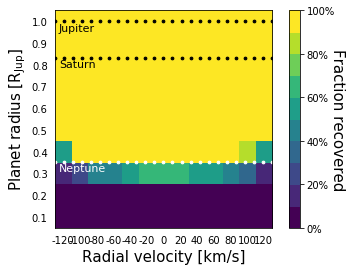

In [5]:
pir.plot_sensitivity(snrlim, veq) # create sensitivity plot

# save and show Figure 1
plt.savefig('../output/figure1/figure1.png', dpi = 300)
plt.savefig('../output/figure1/figure1.pdf')
plt.show()